<h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
<br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
</br>
<h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

</br>
</br>
</br>
</br>
</br>

<h1 style="text-align: center;">Курсовая работа по курсу:</h1>
<h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

</br>
</br>
</br>
</br>
</br>

<h5 style="text-align: right;">Студент: Каирова Екатерина Андреевна</h5>
<h5 style="text-align: right;">Группа: ТФэ-01-21</h5>

</br>
</br>
</br>
</br>
</br>
</br>
</br>



<h5 style="text-align: center;">Москва 2024</h5>

# Вариант №5



 ### $\space$ Дано:
  * $P_0 = 25 \space МПа $ - начальное давление
  * $t_0 = 600 ^\circ C$ -  начальная температура
  * $P_{пп} = 4 \space МПа$ -  давление промперегрева
  * $t_{пп} = 600 ^\circ C$ -  температура промперегрева
  * $P_{к} = 3.5 \space кПа$ -  давление в конденсаторе
  * $t_{п.в.} = 260^\circ C$ -  температура питательной воды

  * $N_{э} = 330 \space МВт$ -  электрическая мощность
  * z = 8 -  число регенеративных подогревателей

# 1. Построение процесса расширения пара в турбине. Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

In [36]:
import HHH as Params
import hs_diagram_helper as hs
import numpy as np
import matplotlib.pyplot as plt 
import CalculationKurs as CK
from scipy.optimize import fsolve
import Splits as splits

In [37]:
MPa = 10 ** 6
kPa = 10 ** 3
MW  = 10 ** 6
unit = 1 / MPa
 

In [38]:
a = Params.Params (N = 330, 
            P0 = 25* MPa, 
            t0 = 600 , 
            P_pp = 4 * MPa, 
            t_pp = 600 , 
            t_fw = 260, 
            Pk = 3.5 * kPa, 
            internal_efficiency = 0.85, 
            mechanical_efficiency = 0.992, 
            generator_efficiency= 0.99)
a.print_coeff()

Коэффициент отношений разности температур =  0.6713922563894766


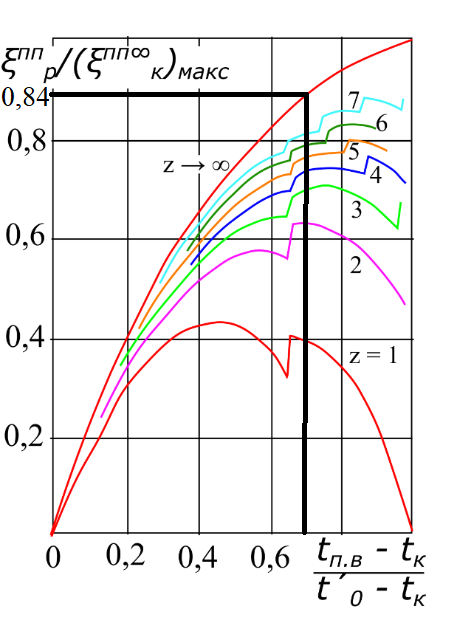

In [39]:
go,gk = a.get_mas_flow(a.get_input(0.84))
print ("Расход в голову турбины равен = ", go)
print ("Расход в конденсатор равен = ", gk)

Расход в голову турбины равен =  241.37299584537968
Расход в конденсатор равен =  164.9351090276238


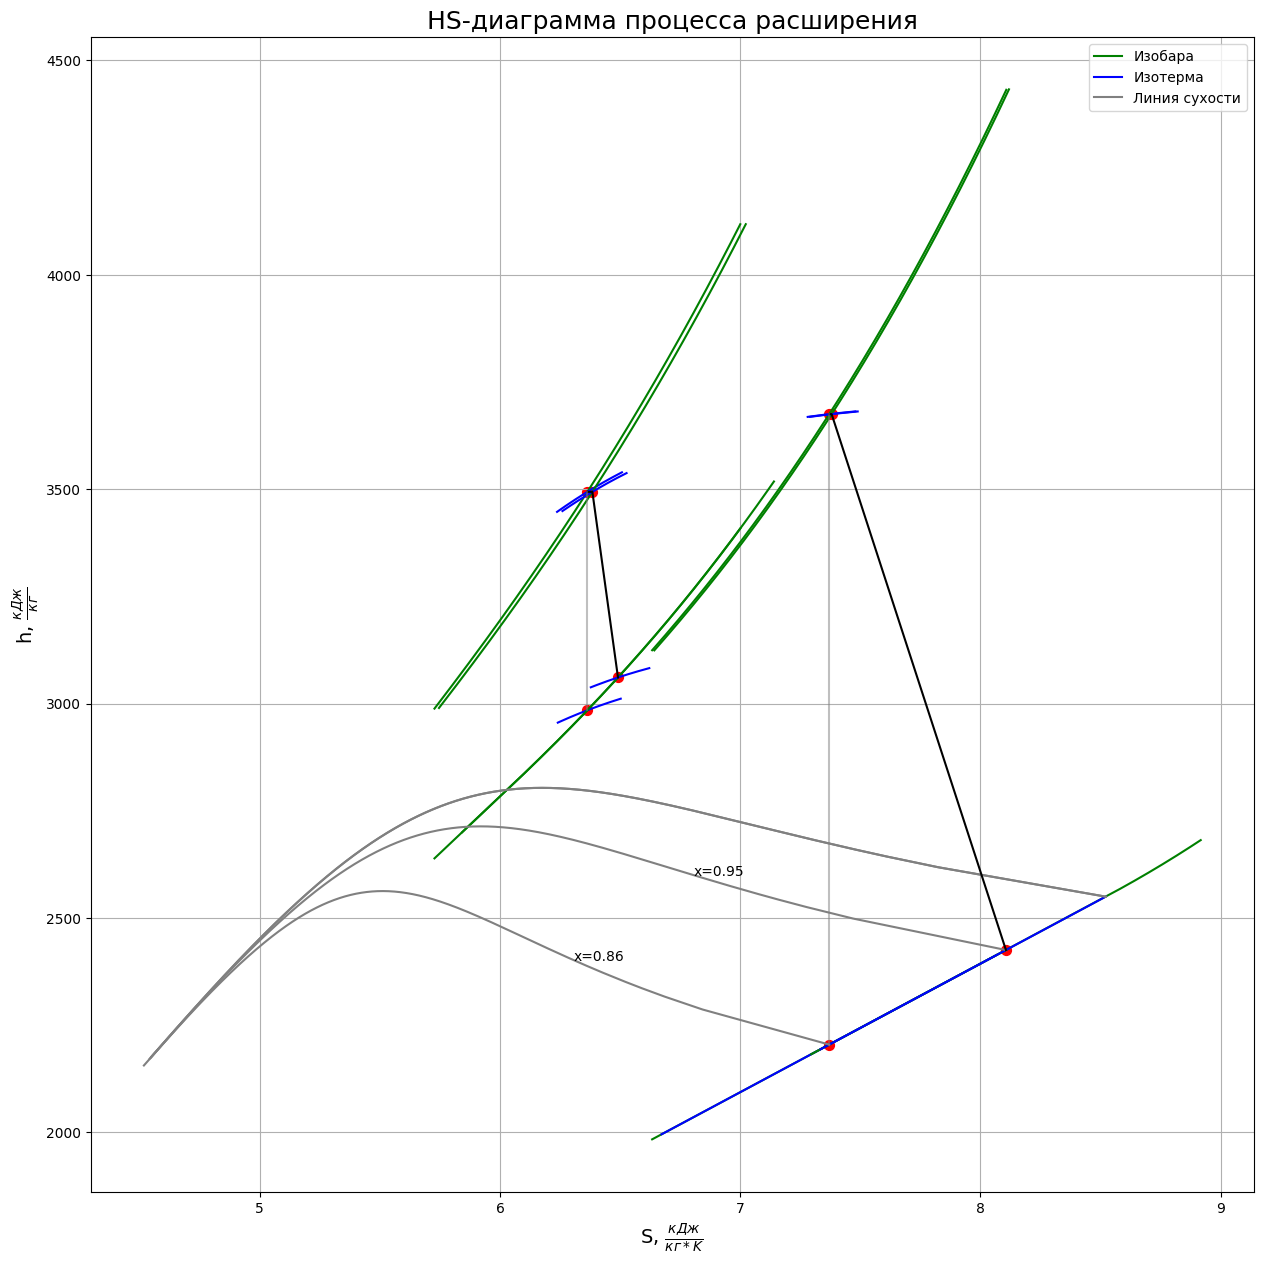

In [40]:
fig, ax  = hs.plt.subplots(1, 1, figsize=(15, 15))
hs.plot_hs_diagram(
    ax,
    points=[a._point_0, a.point_0_true, a._point_1, a.point_1_true, a._point_pp, a.point_pp_true, a._point_k, a.point_k_true]
)
hs.plot_process(ax, points=[a._point_0, a.point_0_true, a.point_1_true], color='black')
hs.plot_process(ax, points=[a._point_pp, a.point_pp_true, a.point_k_true], color='black')
hs.plot_process(ax, points=[a._point_0, a._point_1], alpha=0.5, color='grey')
hs.plot_process(ax, points=[a._point_pp, a._point_k], alpha=0.5, color='grey')

# Задание №2. Проведение расчета регулирующей ступени и определение зависимости $η_о$$_л$ от $U/$$с_ф$. Диапазон варьируемого теплоперепад. Обоснованно выбрать вариант исполнения регулирующей ступени для проектирования ЦВД в рамках заданного диапазона

# Сопловая решетка 

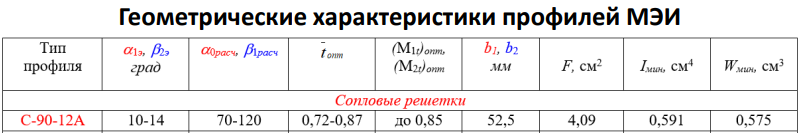

# Рабочая решетка

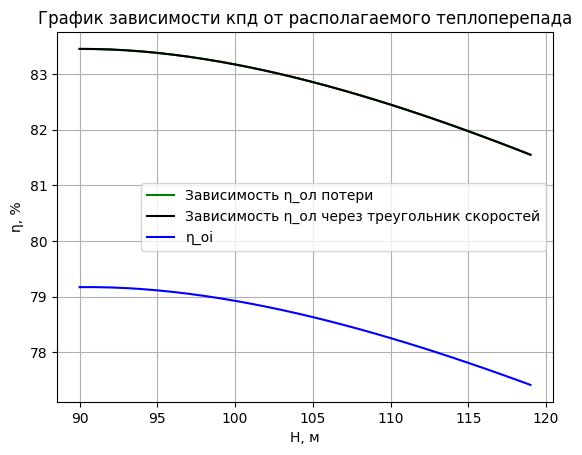

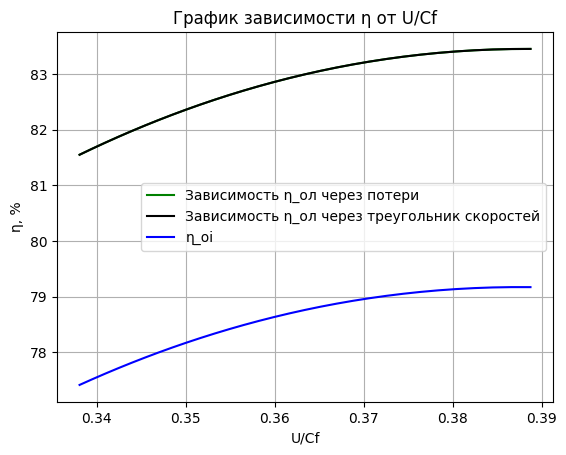

In [41]:
efficiency_loss = []
efficiency_velocity = []
efficiency_internal = []
u_cf = []
for H in np.arange(90,120,1):
    lop = CK.RegularTurbin(tochka_o = a.point_0_true, 
                    n = 50,
                       d = 1.05,
                        H_o = H, 
                         ro = 0.1,
                          G = go, 
                           k = 1.33)
    lop.calc_sopl_lop(b_1 =  52.5 , alpha_1_e = 14 , t_1opt = 0.72)
    lop.calc_for_find_koef_rab_lop(pere = 0.003)
    lop.calc_rab_lop(b_2 = 25.7, t_opt_2 = 0.60)
    eff_ol_loss, eff_ol_velocity =lop.calc_eff(xi_vs = 0)
    N_i,eff_oi  = lop.calc_int_power(z= 10, i =4)
    efficiency_loss.append(eff_ol_loss * 100)
    efficiency_velocity.append(eff_ol_velocity * 100)
    efficiency_internal.append(eff_oi * 100)
    u_cf.append(lop.u_c_f)

H = np.arange(90,120,1)
plt.title("График зависимости кпд от располагаемого теплоперепада") 
plt.xlabel("H, м") 
plt.ylabel("η, %")     
plt.plot(H,efficiency_loss[:30] , color ="green", label = "Зависимость η_ол потери ")
plt.plot(H,efficiency_velocity[:30], color ="black",label = "Зависимость η_ол через треугольник скоростей")
plt.plot(H,efficiency_internal[:30], color ="blue",label = "η_oi")
plt.grid()
plt.legend()
plt.show()

plt.title("График зависимости η от U/Cf") 
plt.xlabel("U/Cf") 
plt.ylabel("η, %")     
plt.plot(u_cf,efficiency_loss, color ="green", label = "Зависимость η_ол через потери")
plt.plot(u_cf,efficiency_velocity, color ="black",label = "Зависимость η_ол через треугольник скоростей")
plt.plot(u_cf,efficiency_internal, color ="blue",label = "η_oi")
plt.grid()
plt.legend()
plt.show()

In [42]:
lop = CK.RegularTurbin(tochka_o = a.point_0_true, 
                    n = 60,
                       d = 1.05,
                        H_o = 90, 
                         ro = 0.1,
                          G = go, 
                           k = 1.33)
fi, mu_1, l_1 , alpha_1_e = lop.calc_sopl_lop(b_1 =  52.5 , alpha_1_e = 14	 , t_1opt = 0.72)
delt_H_c, H_oc,zit_c,mu_1=lop.calc_for_find_koef_rab_lop(pere = 0.003)
w_2, c_2, bett_2, alpha_2, F_2, z_2, l_2, betta_2e = lop.calc_rab_lop(b_2 = 60, t_opt_2 = 0.60)
eff_oi_loss, eff_oi_velocity =lop.calc_eff(xi_vs = 0)
N_i,efficiency_internal  = lop.calc_int_power(z= 10, i =4)
sigma_bend, sigma_streth, b_2, B2e = lop.calc_stength(W_atl = 0.225 ,b_2_atl = 25.9,sigma_bend_dop = 20 )
table_v_d,table_loss, table_points, table_par = lop.tabl()
tochka_1_t, tochka_1, tochka_2_t, tochka_2, tocka_0 = lop.points()

table_loss
b_2
betta_2e,alpha_1_e

(85.0233052144504, 37.58)

# Параметры сопловой и рабочей решетки

In [43]:
table_par

,"Длины лопаток, м","Число лопаток, шт"
,,
Cопловая решетка,0.020,62.0
Рабочая решетка,0.023,92.0


# Значения КПД, напряжений и мощности

In [44]:
print(f"Внутренняя мощность ступени N_i: {np.round(N_i,3)} кВт")
print(f"Изгибающие напряжения σ_и: {np.round(sigma_bend,3)} МПа")
print(f"Напряжение растяжения в корневом сечении рабочей лопатки σ_р: {np.round(sigma_streth,3)} МПа")
print(f"Относительный лопаточный КПД полученный через потери : {np.round(eff_oi_loss * 100,3)} %")
print(f"Относительный лопаточный КПД полученный через треугольник скоростей : {np.round(eff_oi_velocity * 100,3)} %")
print(f"Внутренний относительный КПД  : {np.round(efficiency_internal * 100,3)} %")

Внутренняя мощность ступени N_i: 16821.082 кВт
Изгибающие напряжения σ_и: 5.812 МПа
Напряжение растяжения в корневом сечении рабочей лопатки σ_р: 13.156 МПа
Относительный лопаточный КПД полученный через потери : 85.091 %
Относительный лопаточный КПД полученный через треугольник скоростей : 85.091 %
Внутренний относительный КПД  : 77.432 %


# Процесс расширения ступени

,"P, МПа","T, К, °","h, кДж/кг","s,кДж/(кг*К)"
,,,,
Параметры перед ступенью,23.750,869.217,3493.691,6.385
Теоретичекие параметры за сопловой решеткой,18.770,824.138,3412.691,6.385
Параметры за сопловой решеткой,18.770,824.739,3414.425,6.387
Теоретичекие параметры за ступенью,18.272,819.715,3405.425,6.387
Параметры за ступенью,18.272,822.560,3413.602,6.397


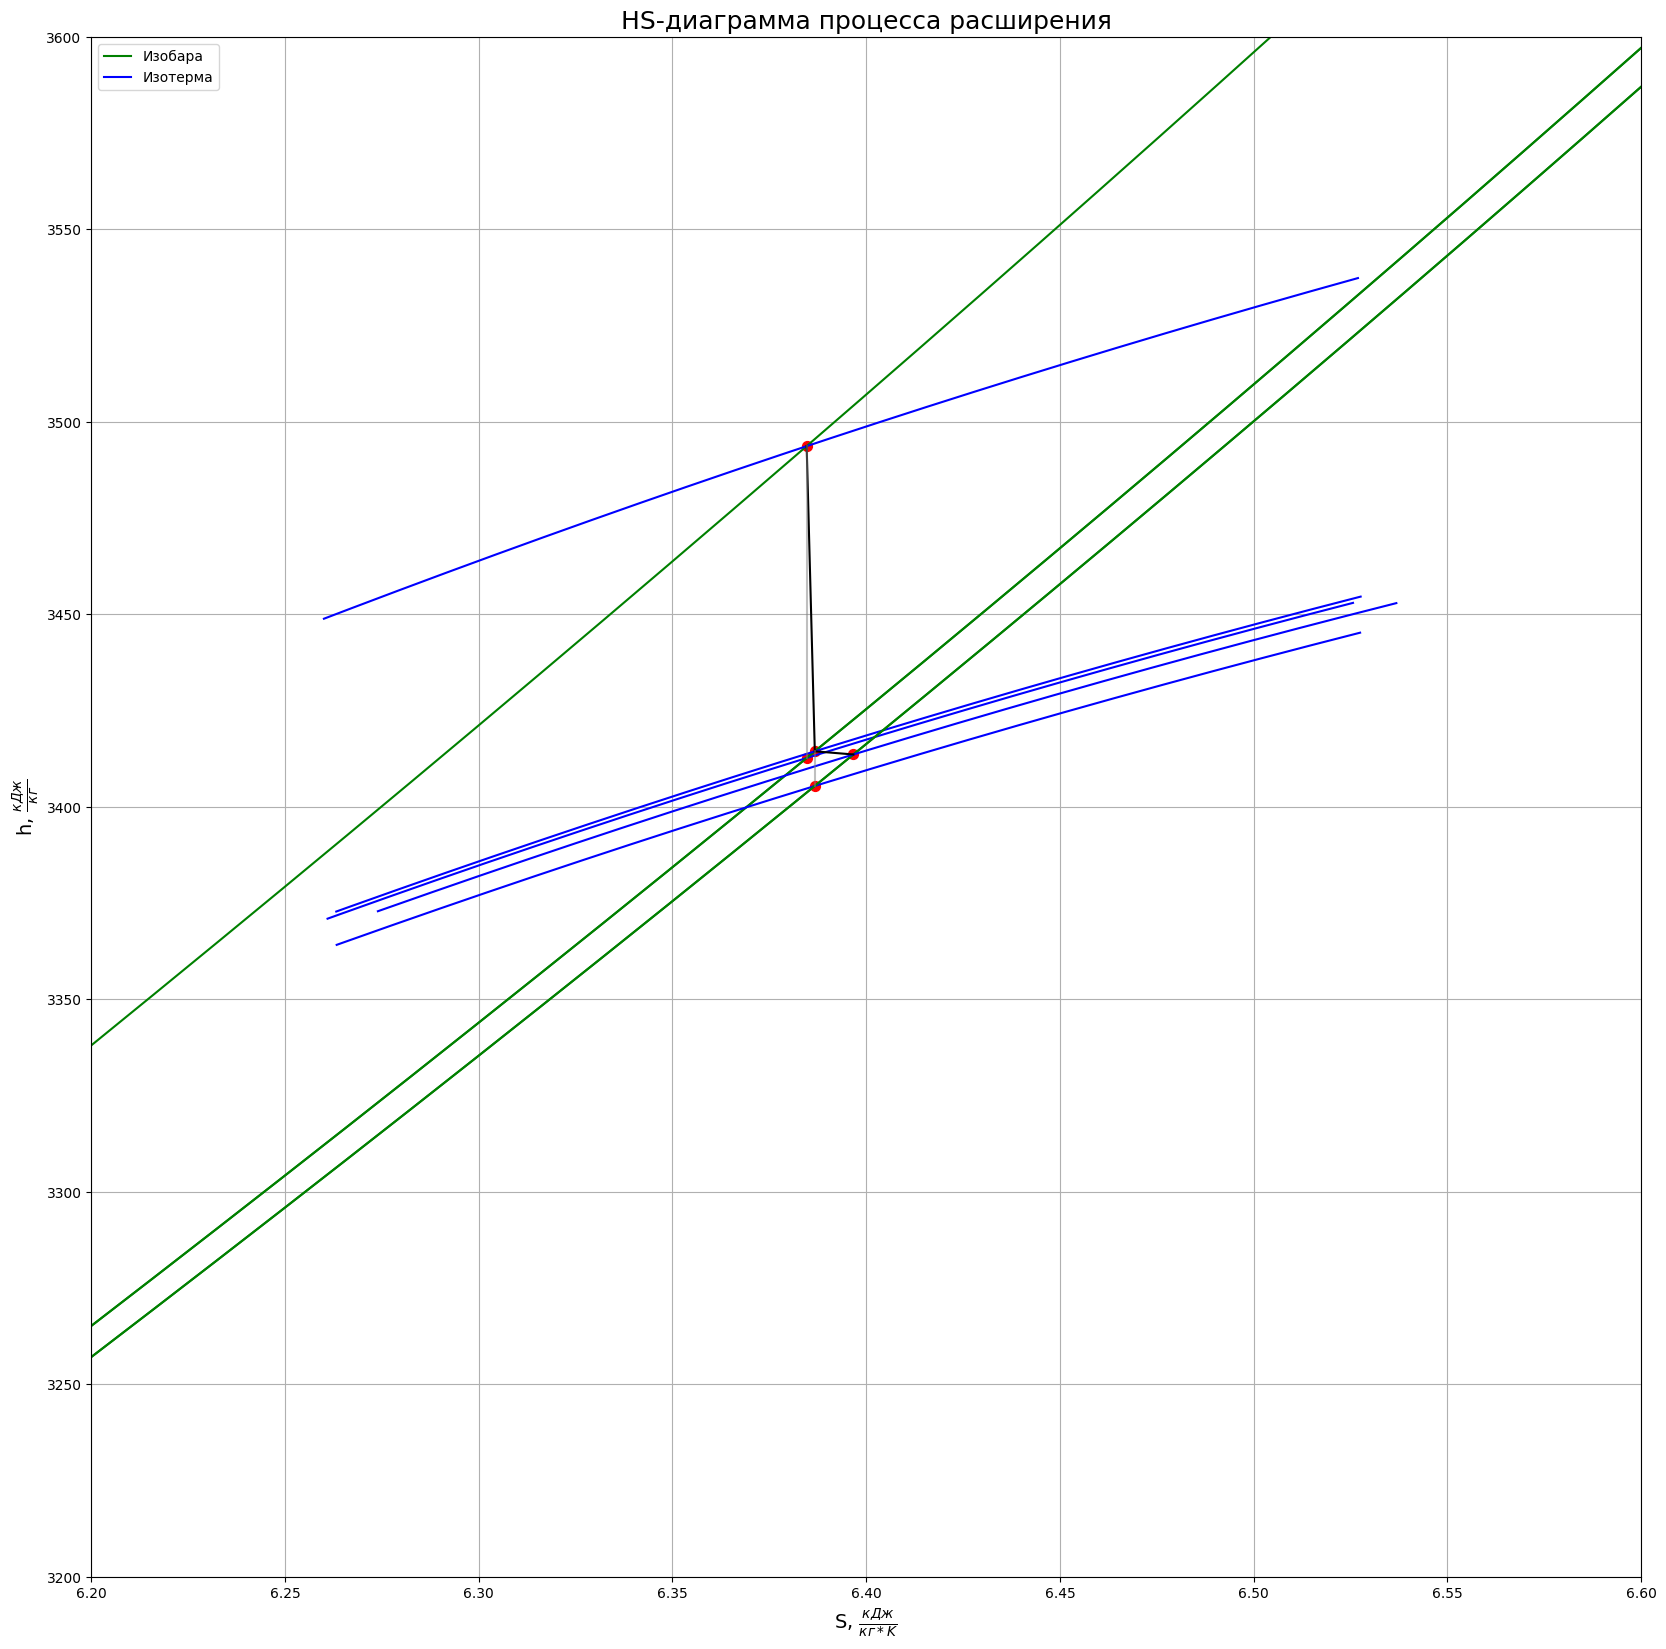

In [45]:
table_points
fig, ax  = hs.plt.subplots(1, 1, figsize=(20, 20))
hs.plot_hs_diagram(
    ax,
    points=[a.point_0_true,tochka_1_t, tochka_1, tochka_2_t, tochka_2]
)
ax.set_xlim(6.2, 6.6)
ax.set_ylim(3200, 3600)
hs.plot_process(ax, points=[a.point_0_true, tochka_1], color='black')
hs.plot_process(ax, points=[tochka_1, tochka_2], color='black')
hs.plot_process(ax, points=[a.point_0_true, tochka_1_t], alpha=0.5, color='grey')
hs.plot_process(ax, points=[tochka_1, tochka_2_t], alpha=0.5, color='grey')
table_points

# Треугольник скоростей

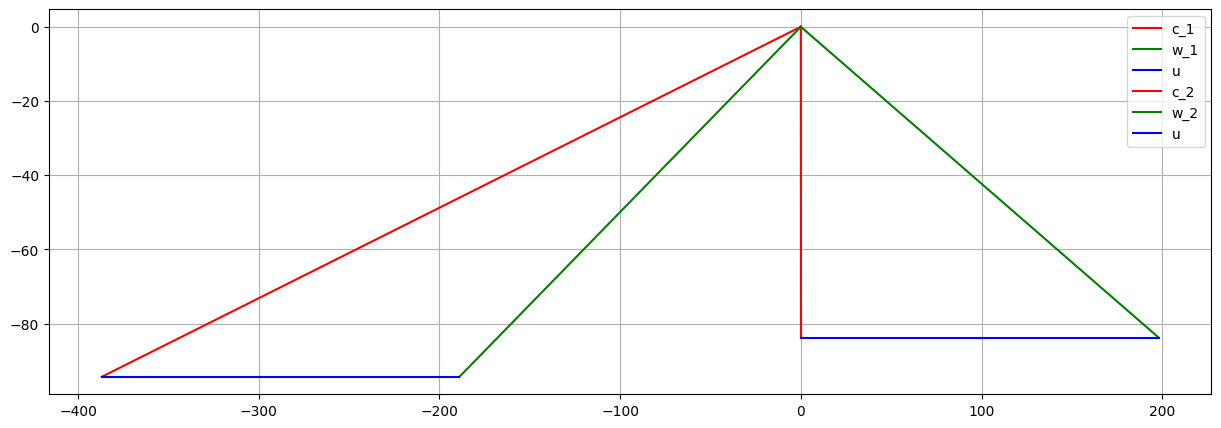

In [46]:
lop.triangle()

In [47]:
table_v_d

,"Абсолютная скорость (с), м/с","Абсолютный угол (α) , °","Относительная скорость выхода (w) , м/с","Относительный угол (β) , °"
,,,,
За сопловой решеткой,398.160,13.702,211.144,26.531
За рабочей решеткой,83.744,90.000,215.003,22.923


# Заданеи № 3 Определение числа ступеней и распределение параметров по ним.

In [48]:
tocka_0.P, tocka_0.h

(18.27218280171553, 3424.001343117004)

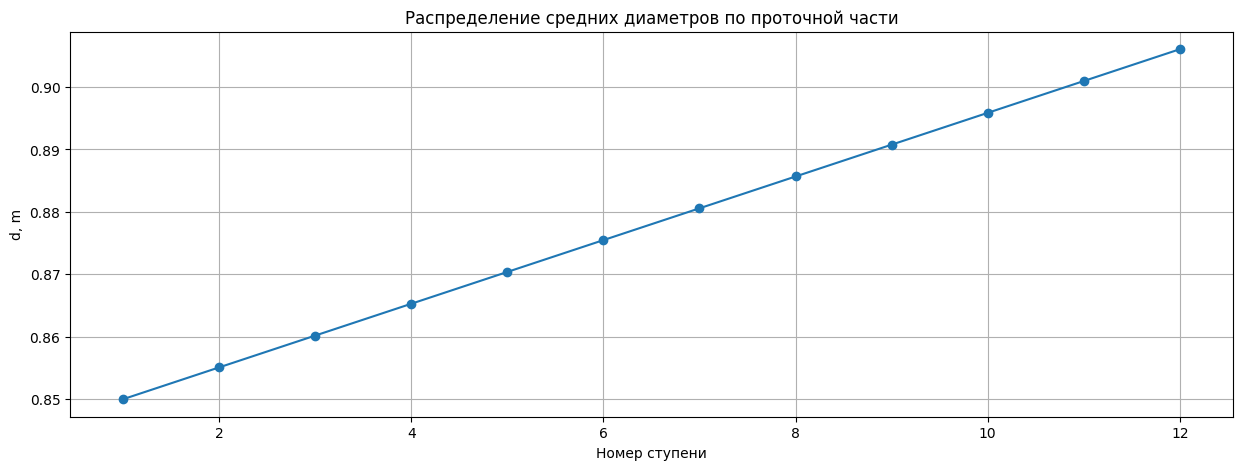

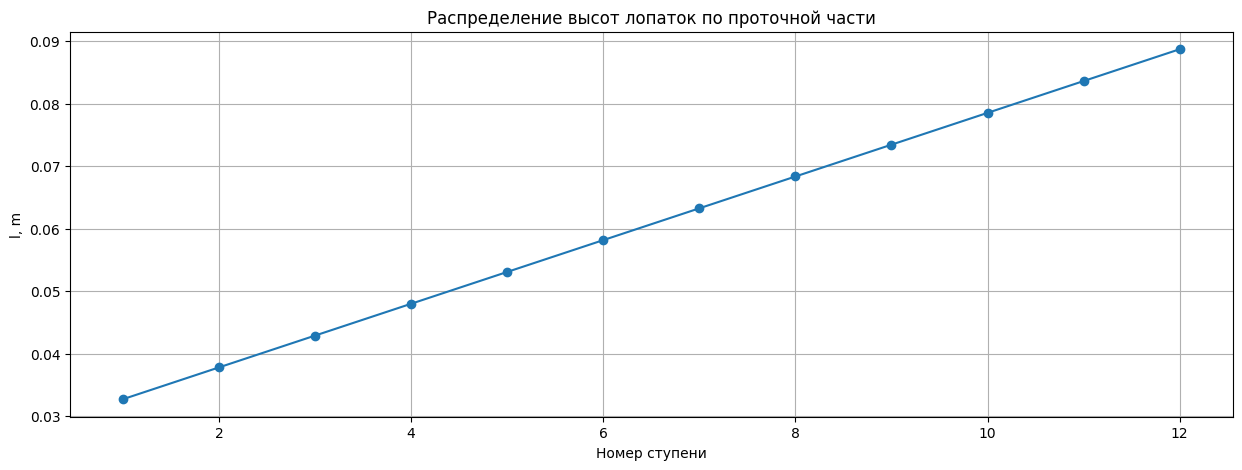

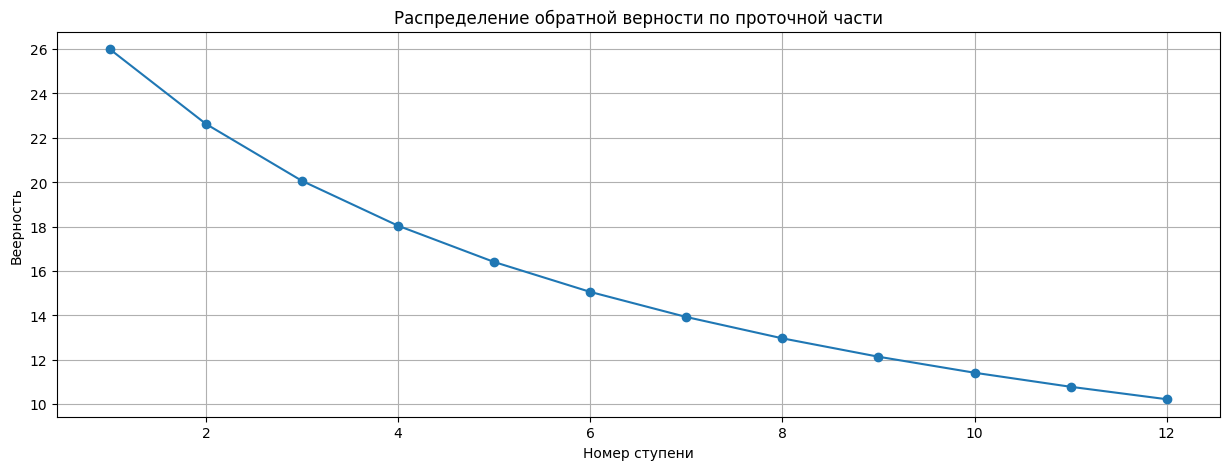

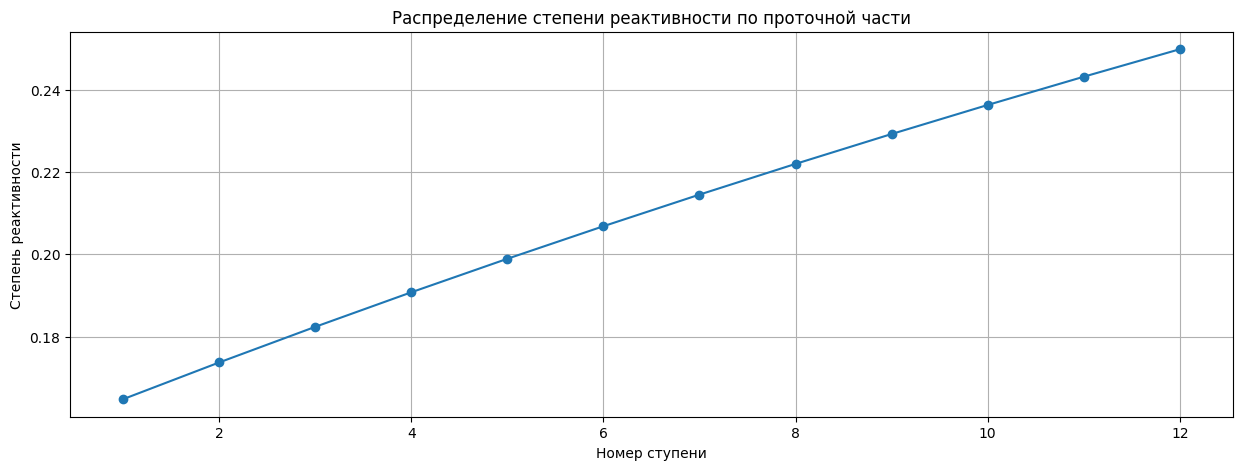

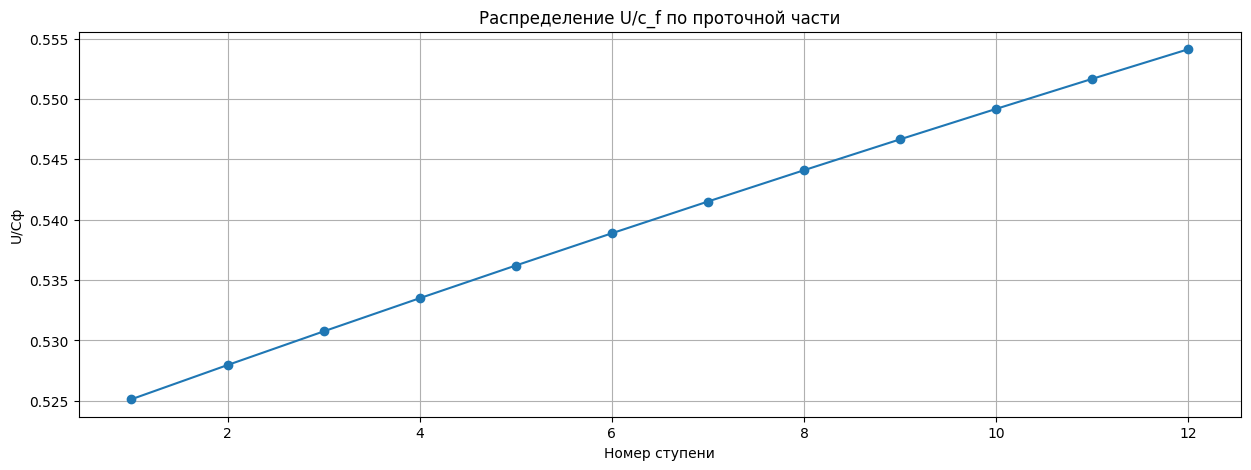

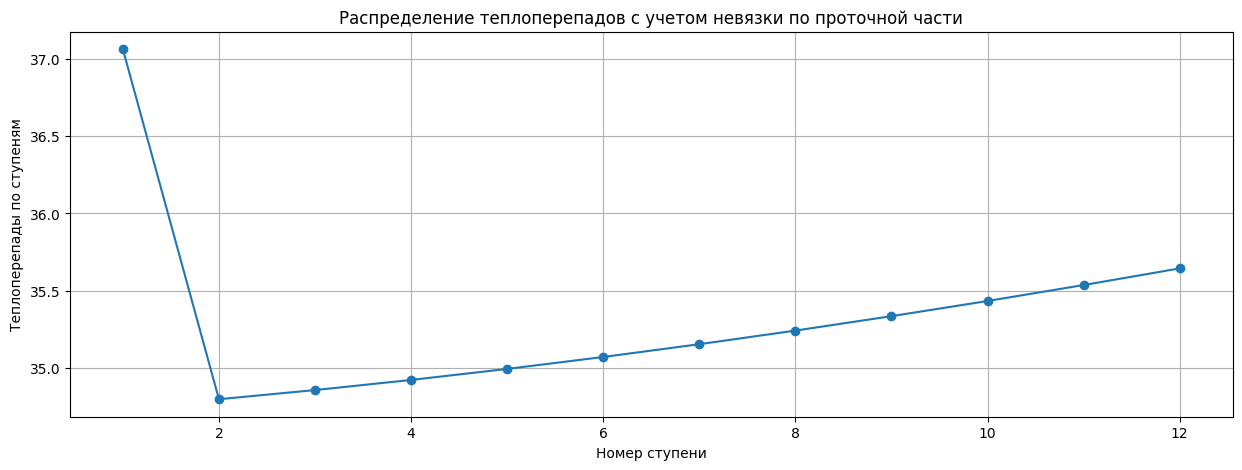

0.8173017965192195

In [49]:
splitting = splits.SBS(d = lop.d, 
                  n = lop.n, 
                      n_stages = 12, 
                          G_0 = go , 
                              P_o = 18.27218280171553, 
                                  h_o = 3424.001343117004,
                                      P_z = a.point_1_true.P ,  
                                          fi = fi ,
                                              alpha_1 = lop.alpha_1_e, 
                                                  ro = lop.ro, 
                                                      mu = mu_1 , 
                                                          efficiency = 0.85, 
                                                              veernost_1 = 15.83)
new_actual_heat_drop,daf, d_k = splitting.calc()
table_ver, tabl_step = splitting.table()
splitting.plot_charts()
d_k

In [50]:
table_ver

,Верность
,
Величина обратной вероятности задоваемая пользователем,15.83
Величина расчитанной обратной вероятности,28.62


In [51]:
tabl_step

,Число ступеней
,
Величина числа ступеней рассчитаная,12
Величина числа ступеней заданная,12
